In [5]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

In [37]:
N = 10241 # length of input sequence
I = 512   # window width

# online measurment of AR signal
def measure_x():
    # it produces input vector of size I
    x = np.sqrt(1.0) * np.random.randn(I)
    return x

# online measurement of AR signal
def measure_d(x):
    # meausure system output
    d = 1.8 * np.random.randn(1) - 0.9
    return d

logger_x = np.zeros(N) # not sure
logger_d = np.zeros(N) # target sig
logger_y = np.zeros(N) # predicted sig
logger_w = np.zeros(N) # AR coeffs ?
filt = pa.filters.FilterRLS(512, mu=0.99)
for k in range(N):
    # measure input parameters
    x = measure_x()
    # predict new value
    y = filt.predict(x)
    # do something with prediction output
    pass
    # measure output signal
    d = measure_d(x)
    # update filter
    d = measure_d(x)
    # logging values
    logger_x[k] = x[-1]
    logger_d[k] = d
    logger_y[k] = y
    print(filt.w.shape)
    logger_w[k] = filt.w

### show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(log_d,"b", label="d - target")
plt.plot(log_y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10((log_d-log_y)**2),"r", label="e - error [dB]")
plt.legend(); plt.tight_layout(); plt.show()

(512,)


ValueError: setting an array element with a sequence.

In [12]:
y_hat = np.zeros(len(logger_y))
for i in range(len(logger_y)):
    y_hat[i] = logger_y[i]

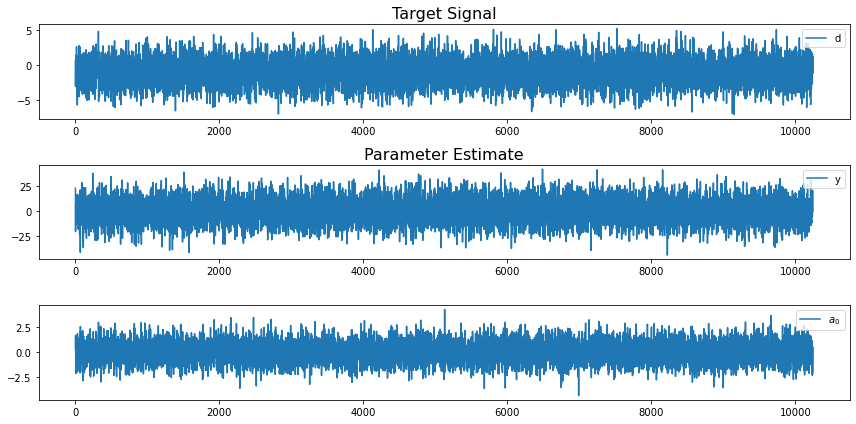

In [30]:
fig, axes = plt.subplots(figsize=(12,6), nrows=3)
axes[0].plot(logger_d, label='d')
# axes[0].set_ylim([e.min()*1.5, e.max()*1.5])
axes[0].legend(loc=1)
axes[0].set_title('Target Signal', fontsize=16) # input signal

axes[1].plot(logger_y, label='y')
# axes[1].set_ylim([e.min()*1.5, e.max()*1.5])
axes[1].legend(loc=1)
axes[1].set_title('Output Signal', fontsize=16)

axes[2].plot(logger_x, label=r'$a_0$') # AR parameters varying
# axes[2].plot(ar_index, ar_hats[:,1], label=r'$a_1$') # AR parameters varying
# axes[2].set_ylim([ar_hats.min(axis=0).min()*1.5, ar_hats.max(axis=0).max()*1.5])
axes[1].set_title('Parameter Estimate', fontsize=16)
axes[2].legend(loc=1)

plt.tight_layout()
plt.show()

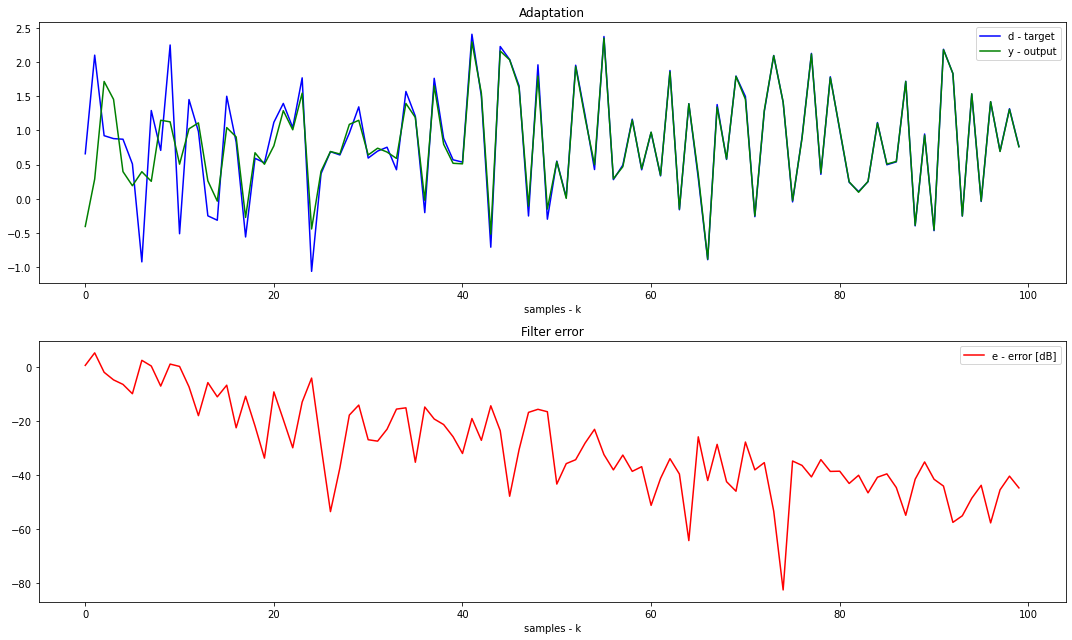

In [4]:
# these two function supplement your online measurment
def measure_x():
    # it produces input vector of size 3
    x = np.random.random(3)
    return x
    
def measure_d(x):
    # meausure system output
    d = 2*x[0] + 1*x[1] - 1.5*x[2]
    return d
    
N = 100
log_d = np.zeros(N)
log_y = np.zeros(N)
filt = pa.filters.FilterRLS(3, mu=0.5)
for k in range(N):
    # measure input
    x = measure_x()
    # predict new value
    y = filt.predict(x)
    # do the important stuff with prediction output
    pass    
    # measure output
    d = measure_d(x)
    # update filter
    filt.adapt(d, x)
    # log values
    log_d[k] = d
    log_y[k] = y
    
### show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(log_d,"b", label="d - target")
plt.plot(log_y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10((log_d-log_y)**2),"r", label="e - error [dB]")
plt.legend(); plt.tight_layout(); plt.show()